In [10]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt


In [11]:
imgs = os.listdir('val2017/random/')

data = np.array([cv2.cvtColor(cv2.resize(cv2.imread('val2017/random/'+x),(100,100)), cv2.COLOR_BGR2RGB) for x in imgs])

In [12]:
data.shape

(5000, 100, 100, 3)

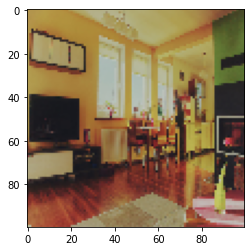

In [13]:
plt.imshow(data[0])

In [14]:
x_train = data[:int(len(data)*0.85)]
x_test = data[int(len(data)*0.85):]

In [15]:
x_train2 = np.array([cv2.GaussianBlur(img,(3,3),cv2.BORDER_DEFAULT) for img in x_train])
print(x_train2.shape)
x_test2 = np.array([cv2.GaussianBlur(img,(3,3),cv2.BORDER_DEFAULT) for img in x_test])
print(x_test2.shape)


(4250, 100, 100, 3)
(750, 100, 100, 3)


In [16]:
x_train2.shape

(4250, 100, 100, 3)

In [17]:
x_train= x_train / 255.0
x_train2 = x_train2 / 255.0
x_test= x_test / 255.0
x_test2= x_test2 / 255.0

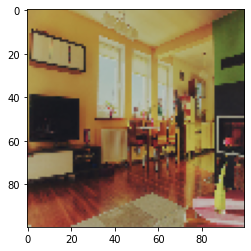

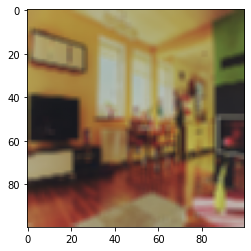

In [18]:

plt.imshow(x_train[0])
plt.pause(0.1)
plt.imshow(x_train2[0])

In [19]:
input = layers.Input(shape=(100, 100, 3))
# Encoder
x = layers.Conv2D(100, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(100, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(100, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(100, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="mae")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 100)       90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 100)      0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 50, 50, 100)      90100 

In [20]:
batch_size = 16
num_classes = 100
epochs = 50

In [21]:
history = autoencoder.fit(x_train2, x_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.10,
                    shuffle=True)

Epoch 1/50
240/240 [==============================] - 12s 26ms/step - loss: 0.0978 - val_loss: 0.0782
Epoch 2/50
240/240 [==============================] - 6s 24ms/step - loss: 0.0660 - val_loss: 0.0723
Epoch 3/50
240/240 [==============================] - 6s 24ms/step - loss: 0.0603 - val_loss: 0.0590
Epoch 4/50
240/240 [==============================] - 6s 25ms/step - loss: 0.0582 - val_loss: 0.0575
Epoch 5/50
240/240 [==============================] - 6s 24ms/step - loss: 0.0564 - val_loss: 0.0553
Epoch 6/50
240/240 [==============================] - 6s 24ms/step - loss: 0.0545 - val_loss: 0.0553
Epoch 7/50
240/240 [==============================] - 6s 24ms/step - loss: 0.0539 - val_loss: 0.0531
Epoch 8/50
240/240 [==============================] - 6s 24ms/step - loss: 0.0530 - val_loss: 0.0557
Epoch 9/50
240/240 [==============================] - 6s 25ms/step - loss: 0.0521 - val_loss: 0.0539
Epoch 10/50
240/240 [==============================] - 6s 25ms/step - loss: 0.0509 - val_l

1/1 [==============================] - 0s 234ms/step


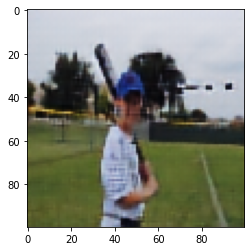

In [22]:
ae_out = autoencoder.predict([ tf.reshape(x_test2[0],(-1, 100, 100, 3)) ])
img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(ae_out[0])

1/1 [==============================] - 0s 123ms/step
input


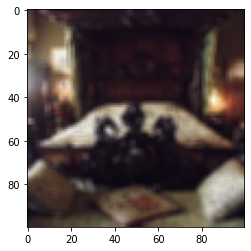

output


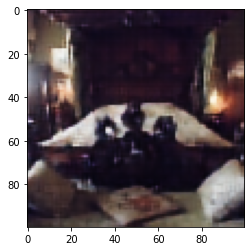

orignal


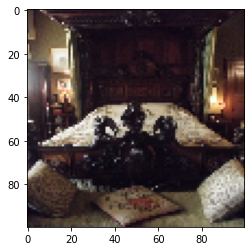

1/1 [==============================] - 0s 123ms/step
input


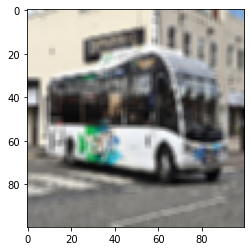

output


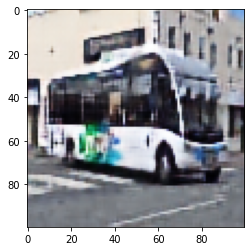

orignal


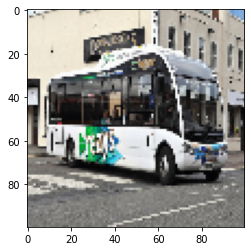

1/1 [==============================] - 0s 118ms/step
input


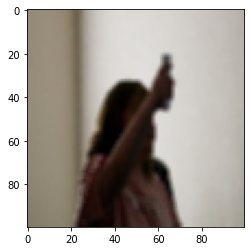

output


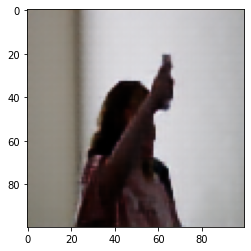

orignal


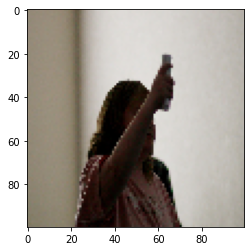

1/1 [==============================] - 0s 128ms/step
input


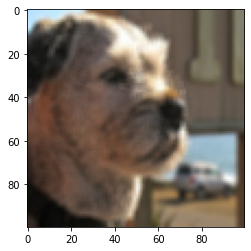

output


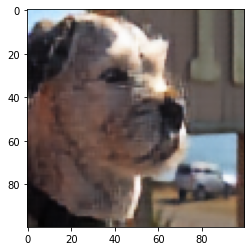

orignal


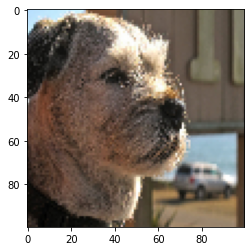

1/1 [==============================] - 0s 121ms/step
input


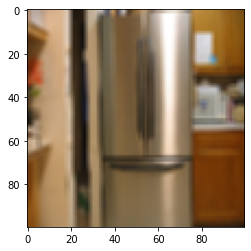

output


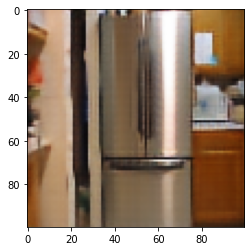

orignal


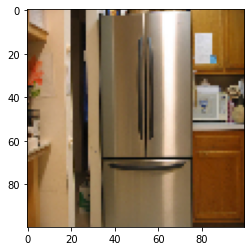

1/1 [==============================] - 0s 124ms/step
input


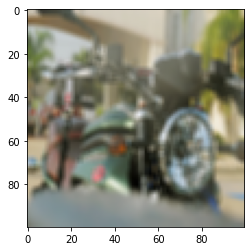

output


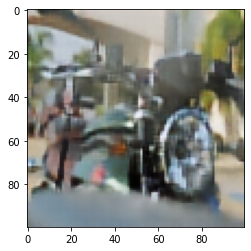

orignal


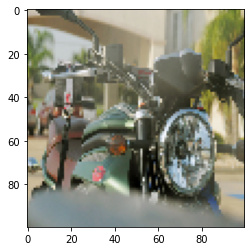

1/1 [==============================] - 0s 119ms/step
input


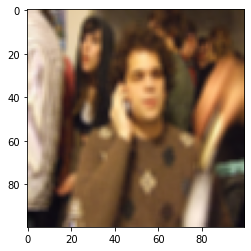

output


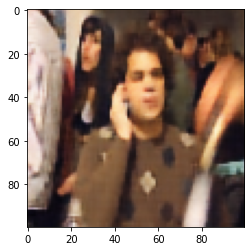

orignal


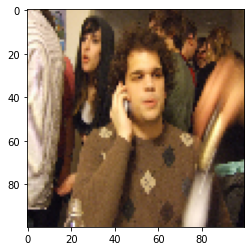

1/1 [==============================] - 0s 118ms/step
input


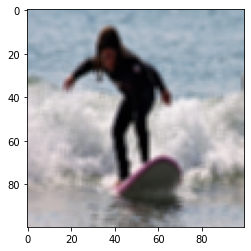

output


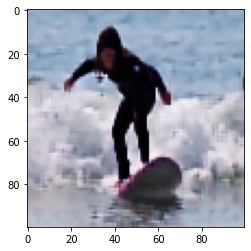

orignal


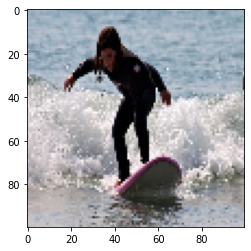

1/1 [==============================] - 0s 120ms/step
input


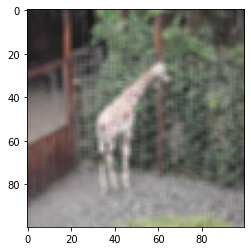

output


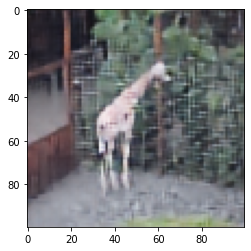

orignal


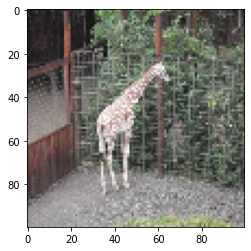

1/1 [==============================] - 0s 137ms/step
input


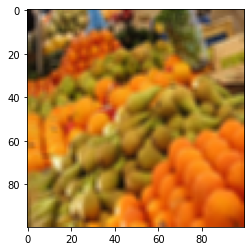

output


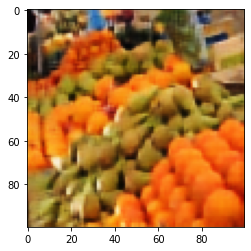

orignal


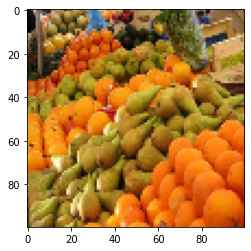

In [23]:

for i in range(random.randrange(-50, -5)):
    index = i
    ae_out = autoencoder.predict([ tf.reshape(x_test2[index],(-1, 100, 100, 3)) ])
    img = ae_out[0]  
    print("input")
    plt.imshow(x_test2[index],cmap='gray')
    plt.pause(0.1)
    print("output")
    plt.imshow(ae_out[0])
    plt.pause(0.1)
    print("orignal")
    plt.imshow(x_test[index])
    plt.pause(0.1)